# hhf_phaseplane #

Jessica Arzavala, summer 2020

Contributions from Jason Ritt

Define a simplified dynamical model in Hodgkin-Huxely form (*HHF*) and explore the system's behavior in phaseplanes and related visualizations. In general, HHF equations are "self-linear", meaning they have the form

$$
\frac{dx_n}{dt} = g_n(X) (E_n(X) - x_n)
$$

where $X=(x_1,\ldots,x_n)$ and $g_n$ and $E_n$ do not depend on $x_n$ (their partial derivatives with respect to $x_n$ are zero everywhere).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits import mplot3d
%matplotlib inline
from scipy.optimize import fsolve

In [70]:
#g,h must be positive
#r,s change steepness
#x0,y0 change center

def E(y, z, params = {'s':10, 'y0':0, 'p':-10, 'z0':0}):
    '''
    E(y, z, s=10, y0=0, p = -10, z0=0)
    Reversal potential for the x variable, with slope s & p and center y0 & z0.
    s>0, p<0
    '''
    
    if params is None:
        s=10
        y0=0
        p=-10
        z0=0
    else:
        s = params['s']
        y0 = params['y0']
        p = params['p']
        z0 = params['z0']
        
    
    
    return 1/(1 + np.exp(-s * (y-y0) - p * (z-z0))) 
    

def F(x, params = ({'r':10, 'x0':1.5})):
    '''
    F(x, r=1, x0=0)
    Reversal potential for the y variable, with slope r and center x0.
    '''
    
    if params is None:
        r=10
        x0=0
    else:
        r = params['r']
        x0 = params['x0']
    
    return 1/(1 + np.exp(-r * (x-x0)))


def G(x, params = ({'q':5, 'z0':0})):
    '''
    Reversal potential for the z variable, with slobe p and center z0.
    '''
    
    if params is None:
        q=-10
        z0=0
    else:
        q = params['q']
        z0 = params['z0']
    
    return 1/(1 + np.exp(-q * (x-z0)))


def model(y_in, t, params):
    '''
    model(y_in, t, params)
    Integrates E and F, where g and h can be other functions but in this case are constants.
    g and h must be posiitve.
    m<h
    '''
    
    if params is None:
        g=2
        h=4
        m=3
        E=E
        F=F
        G=G
        s=10
        y0=0
        p=-10
        z0=0
        r=10
        x0=0
        q=5
    else:        
        g = params['g']
        h = params['h']
        m = params['m']
        E = params['E']
        F = params['F']
        G = params['G']
        s = params['s']
        y0 = params['y0']
        p = params['p']
        z0 = params['z0']
        r = params['r']
        x0 = params['x0']
        q = params['q']
                
    x = y_in[0]
    y = y_in[1]
    z = y_in[2]
    
    #Iapp = 0.05 #bifurcation near Iapp = 0.05, oscillation at Iapp = 0, gets bigger for negative Iapp
    Iapp = -0.15 * (t>= 3) * (t<= 5) + 0.05
    #Iapp = 0.0025
    #Iapp = -0.1
    
    dxdt = g * ( E(y,z,{'s':s,'y0':y0,'p':p,'z0':z0}) + Iapp - x )
    dydt = h * (F(x, {'r':r, 'x0':x0})-y)
    dzdt = m * (G(x, {'q':q, 'z0':z0})-z)
    
    return [dxdt, dydt, dzdt]

def phase_plane(model, E, F, G, g=2, h=3, m=4,s=10, y0=0, p=-10, z0=0, r=10, x0=0, q=5):
    '''
    plots phase plane of integrated model and nullclines.
    '''
    
    fig0, ax0 = plt.subplots(1,1,figsize=(8,8))
    ax = plt.axes(projection='3d')
    
    t = np.linspace(0, 10, 1000)
    
    
    ode_args = {'g':g,'h':h,'m':m,'E':E,'F':F,'G':G,'s':s,'y0':y0,'p':p,'z0':z0,'r':r,'x0':x0,'q':q}
    
    
    lower = 0
    upper = 1
    step = 1
    
    #init_cond = np.array([0.043079590865971795, 0.6675554419323907, 0.6838384458526147]) #lc for Iapp = 0 
    #init_cond = np.array([0.05, 0.65, 0.61]) 
    init_cond = np.array([0.08081408156474804, 0.6918721761820785, 0.69144078760102]) #ss for Iapp = 0.05
    
    for x in range(lower,upper+1,step):
        for y in range(lower,upper+1,step):
            for z in range(lower,upper+1,step):
                #y_out = odeint(model, [x,y,z], t, args = (ode_args,))
                y_out = odeint(model, init_cond, t, args = (ode_args,))
                ax.plot3D(y_out[:,0],y_out[:,1],y_out[:,2])
    
                
    
    plt.axis([lower,upper,lower,upper])
    plt.xlabel('x', fontsize = 18)
    plt.ylabel('y', fontsize = 18)
    ax.set_zlabel('z', fontsize = 18)


    plt.grid()
    
    #x vs y
    plt.figure()
    plt.plot(y_out[:,0],y_out[:,1])
    plt.xlabel('x', fontsize = 18)
    plt.ylabel('y', fontsize = 18)
                
    #y vs z
    plt.figure()
    plt.plot(y_out[:,1],y_out[:,2])
    plt.xlabel('y', fontsize = 18)
    plt.ylabel('z', fontsize = 18)
                
    #x vs z
    plt.figure()
    plt.plot(y_out[:,0],y_out[:,2])
    plt.xlabel('x', fontsize = 18)
    plt.ylabel('z', fontsize = 18)
    
    
    plt.figure()
    plt.plot(t,y_out[:,0]) #E
    plt.plot(t,y_out[:,1]) #F
    plt.plot(t,y_out[:,2]) #G
    plt.xlabel('Time')
    plt.ylabel('State variables')
    
    
    return y_out


0<m<h, s>0, p<0

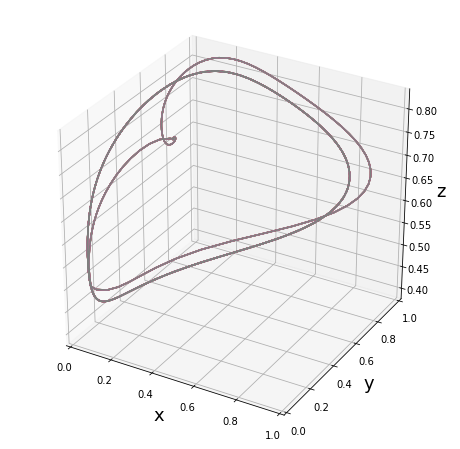

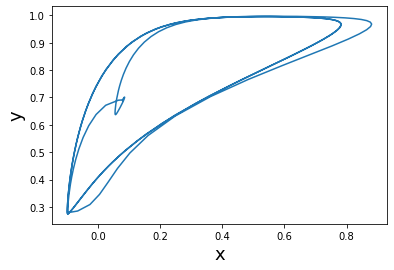

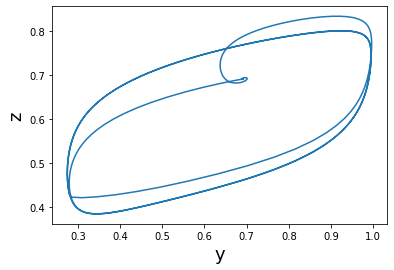

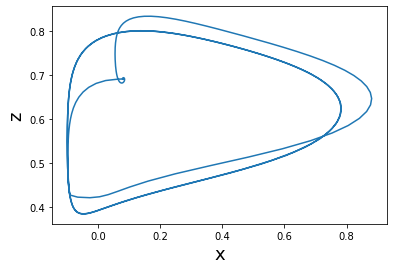

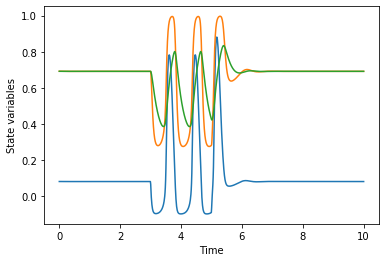

In [71]:
%matplotlib inline
y_out = phase_plane(model, E, F, G, g=35,h=25,m=4,s=15, y0=0, p=-20, z0=0, r=10, x0=0, q=10)


In [5]:
print(y_out[-1,0], y_out[-1,1], y_out[-1,2])

0.7695244741407752 0.9798881823439552 0.6540940000565746


In [8]:
def hhf_roots(y_in, params):
    '''
    hhf_roots(y_in, params)
    
    Computes the difference between phase point y_in and quasi-steady state for HHF model.
    
    Inputs
    ------
    y_in: 3D array-like of phase point
    params: dictionary of parameter values
    
    Returns
    -------
    3D array-like of deviation from fixed point
    '''
    
    if params is None:
        g=2
        h=4
        m=3
        E=E
        F=F
        G=G
        s=10
        y0=0
        p=-10
        z0=0
        r=10
        x0=0
        q=5
        Iapp = 0.05
    else:
        g = params['g']
        h = params['h']
        m = params['m']
        E = params['E']
        F = params['F']
        G = params['G']
        s = params['s']
        y0 = params['y0']
        p = params['p']
        z0 = params['z0']
        r = params['r']
        x0 = params['x0']
        q = params['q']
        Iapp = params['Iapp']
        
    x = y_in[0]
    y = y_in[1]
    z = y_in[2]
        
    xerr = E(y,z,{'s':s,'y0':y0,'p':p,'z0':z0}) + Iapp - x
    yerr = F(x, {'r':r, 'x0':x0}) - y
    zerr = G(x, {'q':q, 'z0':z0}) - z
    
    return [xerr, yerr, zerr]


def hhf_jacobian(fixp,params):
    '''
    Jacobian of HH like system at fixed point fixp. 
    Assumes specific sigmoidal functions for E,F,G. Does not generalize to other
    definitions. You have been warned.
    
    Inputs
    ------
    TODO
    
    Returns
    -------
    TODO
    
    Requires
    --------
    TODO

    '''
    
    if params is None:
        g=2
        h=4
        m=3
        E=E
        F=F
        G=G
        s=10
        y0=0
        p=-10
        z0=0
        r=10
        x0=0
        q=5
        Iapp = 0.05
    else:
        g = params['g']
        h = params['h']
        m = params['m']
        E = params['E']
        F = params['F']
        G = params['G']
        s = params['s']
        y0 = params['y0']
        p = params['p']
        z0 = params['z0']
        r = params['r']
        x0 = params['x0']
        q = params['q']
        Iapp = params['Iapp']

    x = fixp[0]
    y = fixp[1]
    z = fixp[2]

    # WARNING: These derivatives apply _only_ to sigmoid definitions
    
    dEdy = s * E(y,z,{'s':s,'y0':y0,'p':p,'z0':z0}) * ( 1-E(y,z,{'s':s,'y0':y0,'p':p,'z0':z0}) )
    dEdz = p * E(y,z,{'s':s,'y0':y0,'p':p,'z0':z0}) * ( 1-E(y,z,{'s':s,'y0':y0,'p':p,'z0':z0}) )
    dFdx = r * F(x, {'r':r, 'x0':x0}) * ( 1-F(x, {'r':r, 'x0':x0}) )
    dGdx = q * G(x, {'q':q, 'z0':z0}) * ( 1-G(x, {'q':q, 'z0':z0}) )

    J = np.array([[-g , g*dEdy, g*dEdz], [h*dFdx, -h, 0], [m*dGdx, 0, -m] ])
#     xerr = E(y,z,{'s':s,'y0':y0,'p':p,'z0':z0}) + Iapp - x
#     yerr = F(x, {'r':r, 'x0':x0}) - y
#     zerr = G(x, {'q':q, 'z0':z0}) - z

    return J

In [33]:
Iapp = 0.00254706441325
ode_args = {'Iapp':Iapp, 'E':E, 'F':F, 'G':G, 'g':35,'h':25,'m':4,'s':15, 'y0':0, 'p':-20, 'z0':0, 'r':10, 'x0':0, 'q':10}
fixp = fsolve(hhf_roots,[0.5,0.5,0.5], args= (ode_args,))
J = hhf_jacobian(fixp,ode_args)
print(J)

[[-35.          22.17798204 -29.57064272]
 [ 59.20649105 -25.           0.        ]
 [  9.47303857   0.          -4.        ]]


In [34]:
evals_vec = np.linalg.eig(J)
print(evals_vec[0])

[-6.40000000e+01+0.j         -5.62838665e-12+9.05777807j
 -5.62838665e-12-9.05777807j]


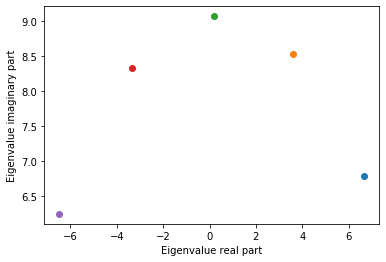

In [63]:
Iapp_list = [-0.1, -0.05, 0, 0.05, 0.1]
for Iapp in Iapp_list:
    ode_args = {'Iapp':Iapp, 'E':E, 'F':F, 'G':G, 'g':35,'h':25,'m':4,'s':15, 'y0':0, 'p':-20, 'z0':0, 'r':10, 'x0':0, 'q':10}
    fixp = fsolve(hhf_roots,[0.5,0.5,0.5], args= (ode_args,))
    J = hhf_jacobian(fixp,ode_args)
    evals_vec = np.linalg.eig(J)
    eigval = evals_vec[0][1]
    plt.plot(np.real(eigval),np.imag(eigval),'-o') 
    plt.xlabel('Eigenvalue real part')
    plt.ylabel('Eigenvalue imaginary part')

Text(0, 0.5, 'Eigenvalue imaginaery part')

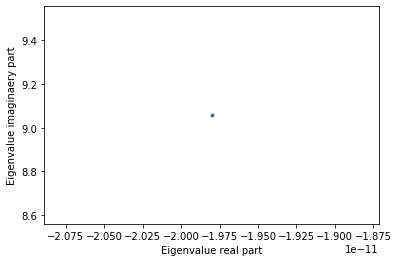

In [24]:
eigval = evals_vec[0][1]
plt.plot(np.real(eigval),np.imag(eigval),'.')   
plt.xlabel('Eigenvalue real part')
plt.ylabel('Eigenvalue imaginary part')